In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA

from time import time

In [2]:
df = pd.read_csv('batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
#df.set_index(df["Unnamed: 0"], inplace=True)
df.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,4.345819,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [3]:
#transpose the dataframe --> make genes as dementions 
dfn = df.T
dfn['mgs_level'] = 0
dfn.reset_index(inplace = True)
list = dfn['index'].apply(lambda x:x[-1]).tolist()
#list 
dfn['mgs_level'] = list
level = dfn.pop('mgs_level')
dfn.insert(1,'mgs_level',level)
dfn.head()


,index,mgs_level,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
0,100_2,2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
1,101_3,3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
2,102_2,2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
3,103_3,3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
4,104_2,2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


# Call t-SNE

In [4]:
test = dfn.drop(['index', 'mgs_level'], axis=1)
test.head()
#train = test.values
Y = TSNE(n_components = 2).fit_transform(test)
Y.shape

(453, 2)

In [5]:
dfn['tsne-2d-one'] = Y[:,0]
dfn['tsne-2d-two'] = Y[:,1]
dfn.head()

,index,mgs_level,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
0,100_2,2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,...,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373,14.608427,-9.347934
1,101_3,3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,...,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671,-16.947321,12.463155
2,102_2,2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,...,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135,16.446180,-10.381666
3,103_3,3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,...,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008,13.965241,-9.649750
4,104_2,2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,...,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005,14.752834,-9.535036


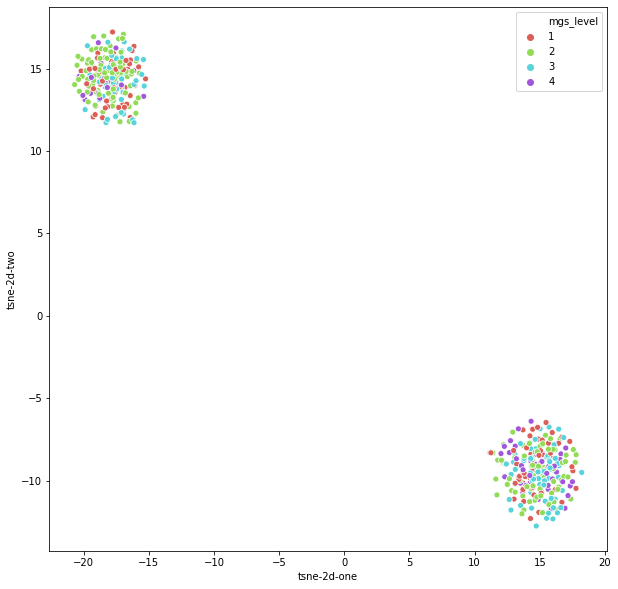

In [6]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls", 4),
    data = dfn
)
fig.figure.savefig("tsne-2d.png",dpi = 300)

In [7]:
#original matrix--> LOT OF TIME TO RUN !!! -->runs on server 
test = dfn.drop(['index', 'mgs_level'], axis=1)
test.head()


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
0,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,...,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373,14.608427,-9.347934
1,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,...,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671,-16.947321,12.463155
2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,...,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135,16.446180,-10.381666
3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,...,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008,13.965241,-9.649750
4,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,...,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005,14.752834,-9.535036


# 3D figure

In [8]:
#3D MAP
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(test)
#pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
#my_color=df['mgs_level'].cat.codes
result=pd.DataFrame(pca.transform(test), columns=['PCA%i' % i for i in range(3)], index=test.index)
result.head()
#result2 = pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
#result2.head()

,PCA0,PCA1,PCA2
0,-21.201595,-0.026181,2.343234
1,22.747035,8.905161,-4.065630
2,-23.112724,-4.424990,-1.974749
3,-21.018216,2.703196,-3.998578
4,-21.395641,-2.787264,-0.261756


In [10]:
result['mgs_level'] = dfn['mgs_level']
result.head()
result['mgs_level'] = result['mgs_level'].replace('2','AMD_2')
result['mgs_level'] = result['mgs_level'].replace('1','AMD_1')
result['mgs_level'] = result['mgs_level'].replace('3','AMD_3')
result['mgs_level'] = result['mgs_level'].replace('4','AMD_4')
result.head()

,PCA0,PCA1,PCA2,mgs_level
0,-21.201595,-0.026181,2.343234,AMD_2
1,22.747035,8.905161,-4.065630,AMD_3
2,-23.112724,-4.424990,-1.974749,AMD_2
3,-21.018216,2.703196,-3.998578,AMD_3
4,-21.395641,-2.787264,-0.261756,AMD_2


<Figure size 720x720 with 0 Axes>

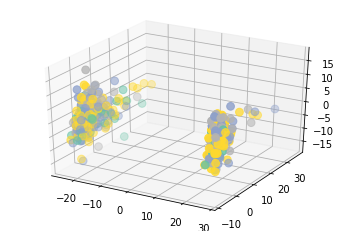

In [11]:
# Plot initialisation
plt.figure(figsize = (10,10))

result['mgs_level']=pd.Categorical(result['mgs_level'])
my_color = result['mgs_level'].cat.codes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],c = my_color, cmap="Set2_r", s=60)
fig.savefig("pca-3d.png",dpi = 300)

# pca-2D

In [13]:
test = dfn.drop(['index', 'mgs_level'], axis=1)
test.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
0,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,...,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373,14.608427,-9.347934
1,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,...,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671,-16.947321,12.463155
2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,...,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135,16.446180,-10.381666
3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,...,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008,13.965241,-9.649750
4,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,...,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005,14.752834,-9.535036


In [14]:
pca2d = PCA(n_components=2)
principalComponents = pca2d.fit_transform(test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

In [15]:
principalDf.head(5)
#for each gene ,cannot label to four stage

,pca1,pca2
0,-21.201595,-0.025440
1,22.747035,8.905788
2,-23.112724,-4.424309
3,-21.018216,2.703524
4,-21.395641,-2.787299


In [16]:
#dfn.reset_index(inplace = True)
finalDf = pd.concat([principalDf, dfn[['mgs_level']]], axis = 1)
finalDf.head(5)

,pca1,pca2,mgs_level
0,-21.201595,-0.025440,2
1,22.747035,8.905788,3
2,-23.112724,-4.424309,2
3,-21.018216,2.703524,3
4,-21.395641,-2.787299,2


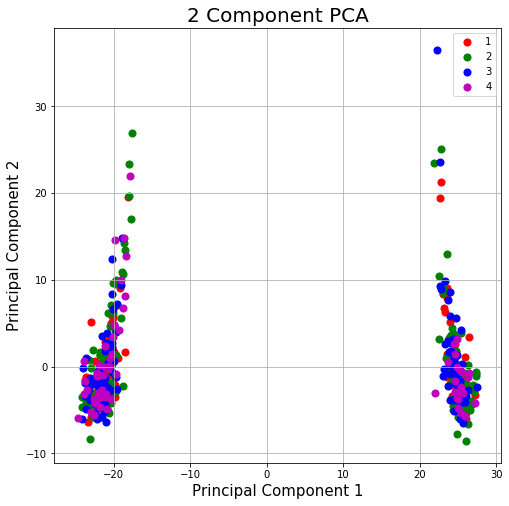

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['1', '2', '3','4']
colors = ['r', 'g', 'b','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['mgs_level'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig("pca-2d.png",dpi = 300)

# Merge two dataset, label samples by gender

--> SOLVED: we have found the reason for two main cluster is gender
--> QUESTION: when color the sample by amd stage(for female/male only),does not show clusters

In [18]:
retina = pd.read_csv('meta_retina.csv', index_col = [0])
sub_retina = pd.DataFrame(retina,columns = ['age','sex','rna_isolation_batch','library_prepper'])
cleaned = pd.read_csv('batchcorrected_log2cpm.tsv', sep = '\t', index_col = [0])
cleaned = cleaned.transpose()
#merge two frame 
df = sub_retina.join(cleaned)
#df.shape -- (523,18057)
df.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
1_2,61.0,M,isobatch1,MRS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
3_1,81.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
5_1,75.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#drop rows with NaN to clean the dataframe
fclean = df.dropna(axis=0,how='any')
fclean.shape # --(453,18057 )
fclean.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,73.0,F,isobatch1,RRP,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,89.0,F,isobatch1,RRP,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,72.0,F,isobatch1,MRS,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [20]:
test = fclean.drop(['age','sex','rna_isolation_batch','library_prepper'],axis = 1)
test.head()
Y = TSNE(n_components = 2).fit_transform(test)
Y.shape

(453, 2)

In [21]:
fclean['tsne-2d-one'] = Y[:,0]
fclean['tsne-2d-two'] = Y[:,1]
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601,1.859226,25.227852
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704,1.190389,25.874390
6_1,73.0,F,isobatch1,RRP,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712,4.428998,27.602446
7_3,89.0,F,isobatch1,RRP,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,...,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396,3.085538,24.987358
8_2,72.0,F,isobatch1,MRS,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,...,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421,2.173957,25.102051


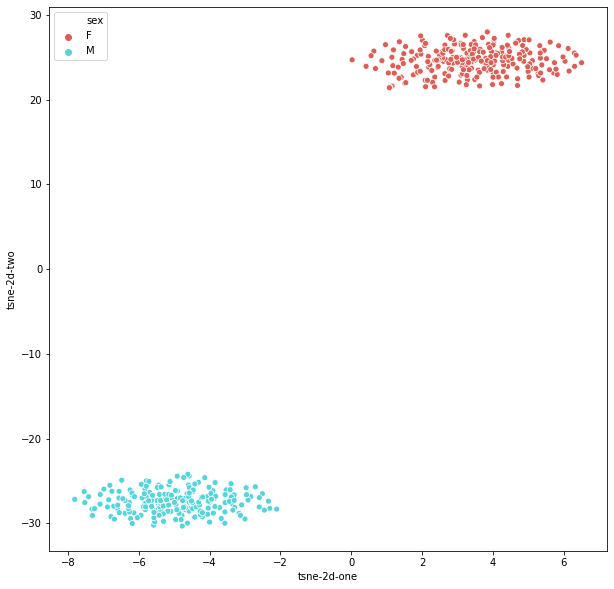

In [22]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "sex",
    palette = sns.color_palette("hls", 2),
    data = fclean
)
fig.figure.savefig("tsne-2d.png",dpi = 300)

# MERGE ANNOTATION.TSV and REMOVE X,Y


In [31]:
merge = pd.read_csv('batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
merge.head() #(18053, 453)

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,4.345819,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [32]:
#anno = pd.read_csv('AnnotationFile.tsv', index_col = [0])
anno = pd.read_csv('AnnotationFile.tsv', sep = '\t', index_col = [0])
anno.head()

,external_gene_name,chromosome_name,start_position,end_position,strand,gene_length,gene_biotype
ensembl_gene_id,,,,,,,
ENSG00000000003,TSPAN6,X,100627109,100639991,-1,4535.0,protein_coding
ENSG00000000005,TNMD,X,100584802,100599885,1,1610.0,protein_coding
ENSG00000000419,DPM1,20,50934867,50958555,-1,1207.0,protein_coding
ENSG00000000457,SCYL3,1,169849631,169894267,-1,6883.0,protein_coding
ENSG00000000460,C1orf112,1,169662007,169854080,1,5967.0,protein_coding


In [33]:
anno = anno[anno.chromosome_name != 'X']
anno.head()
anno = anno[anno.chromosome_name != 'Y']
anno.head()

,external_gene_name,chromosome_name,start_position,end_position,strand,gene_length,gene_biotype
ensembl_gene_id,,,,,,,
ENSG00000000419,DPM1,20,50934867,50958555,-1,1207.0,protein_coding
ENSG00000000457,SCYL3,1,169849631,169894267,-1,6883.0,protein_coding
ENSG00000000460,C1orf112,1,169662007,169854080,1,5967.0,protein_coding
ENSG00000000938,FGR,1,27612064,27635277,-1,3474.0,protein_coding
ENSG00000000971,CFH,1,196651878,196747504,1,8145.0,protein_coding


In [34]:
both = merge.join(anno)#(18053,460)
both= both.dropna(axis=0,how='any')
both.shape # (17421,460)
both.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,97_2,98_3,99_1,external_gene_name,chromosome_name,start_position,end_position,strand,gene_length,gene_biotype
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.492435,4.560072,4.415542,DPM1,20,50934867.0,50958555.0,-1.0,1207.0,protein_coding
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.840323,4.880159,4.652706,SCYL3,1,169849631.0,169894267.0,-1.0,6883.0,protein_coding
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.334682,4.361387,3.685774,C1orf112,1,169662007.0,169854080.0,1.0,5967.0,protein_coding
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.578141,0.897523,1.096682,FGR,1,27612064.0,27635277.0,-1.0,3474.0,protein_coding
ENSG00000000971,4.015480,3.843299,3.846015,3.877232,4.456291,4.251444,4.167410,3.808677,4.057762,4.302872,...,4.215000,3.983356,4.045732,CFH,1,196651878.0,196747504.0,1.0,8145.0,protein_coding


In [44]:
cleandf = both.drop(['external_gene_name','chromosome_name','start_position','end_position','strand','gene_length','gene_biotype'],axis = 1)
cleandf.head() #final: (17421, 453) vs original : (18053, 453)

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682
ENSG00000000971,4.015480,3.843299,3.846015,3.877232,4.456291,4.251444,4.167410,3.808677,4.057762,4.302872,...,3.140015,3.871984,3.694756,3.987447,4.604056,4.457524,3.684325,4.215000,3.983356,4.045732


In [45]:
ndf = cleandf.T
ndf['MGS_LEVEL'] = 0
ndf.head()

,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,MGS_LEVEL
100_2,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,6.922510,...,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373,0
101_3,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,7.032510,...,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671,0
102_2,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,6.922071,...,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135,0
103_3,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,6.873689,...,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008,0
104_2,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,6.842389,...,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005,0


In [47]:
sub_retina.head()

,age,sex,rna_isolation_batch,library_prepper
r_id,,,,
1_2,61.0,M,isobatch1,MRS
2_1,77.0,F,isobatch1,RRP
3_1,81.0,F,isobatch1,RRP
4_1,88.0,F,isobatch1,RRP
5_1,75.0,F,isobatch1,RRP


In [51]:
test = sub_retina.join(ndf)
test.head()
test = test.dropna(axis = 0, how = 'any')
test.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,MGS_LEVEL
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,isobatch1,RRP,4.235433,5.053473,4.289574,0.458265,4.191310,3.593464,...,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601,0.0
4_1,88.0,F,isobatch1,RRP,4.574944,4.862087,4.481557,1.373639,4.148119,3.395882,...,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704,0.0
6_1,73.0,F,isobatch1,RRP,4.221508,4.873337,4.534734,1.018128,3.889556,3.588055,...,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712,0.0
7_3,89.0,F,isobatch1,RRP,4.445611,4.935690,4.307946,0.923342,3.173271,3.755399,...,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396,0.0
8_2,72.0,F,isobatch1,MRS,4.428162,4.772258,3.835178,1.740931,4.706419,3.355962,...,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421,0.0


In [53]:
ndf.head()
new = pd.DataFrame()
new = ndf.reset_index()
new.head()

,index,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,MGS_LEVEL
0,100_2,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,...,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373,0
1,101_3,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,...,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671,0
2,102_2,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,...,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135,0
3,103_3,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,...,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008,0
4,104_2,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,...,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005,0


In [55]:
mlist = new ['index'].apply(lambda x:x[-1]).tolist()
test['MGS_LEVEL'] = mlist
level = test.pop('MGS_LEVEL')
test.insert(0,'MGS_LEVEL',level)
test.head()

,MGS_LEVEL,age,sex,rna_isolation_batch,library_prepper,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,2,77.0,F,isobatch1,RRP,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,3,88.0,F,isobatch1,RRP,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,2,73.0,F,isobatch1,RRP,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,3,89.0,F,isobatch1,RRP,4.445611,4.935690,4.307946,0.923342,3.173271,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,2,72.0,F,isobatch1,MRS,4.428162,4.772258,3.835178,1.740931,4.706419,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [57]:
cleantest = test.drop(['MGS_LEVEL','age','sex','rna_isolation_batch','library_prepper'],axis = 1)
cleantest.head()

,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,4.235433,5.053473,4.289574,0.458265,4.191310,3.593464,5.479866,5.704291,4.974509,6.950925,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,4.574944,4.862087,4.481557,1.373639,4.148119,3.395882,4.909227,5.867000,5.261241,6.768918,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,4.221508,4.873337,4.534734,1.018128,3.889556,3.588055,5.279591,5.804916,5.262013,6.869554,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,4.445611,4.935690,4.307946,0.923342,3.173271,3.755399,5.034120,5.531545,5.163387,6.932756,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,4.428162,4.772258,3.835178,1.740931,4.706419,3.355962,5.321214,5.926948,5.281716,6.998173,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [58]:
Y = TSNE(n_components = 2).fit_transform(cleantest)
Y.shape

(453, 2)

In [59]:
test['tsne-2d-one'] = Y[:,0]
test['tsne-2d-two'] = Y[:,1]
test.head()

,MGS_LEVEL,age,sex,rna_isolation_batch,library_prepper,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,2,77.0,F,isobatch1,RRP,4.235433,5.053473,4.289574,0.458265,4.191310,...,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601,-2.758668,-1.794304
4_1,3,88.0,F,isobatch1,RRP,4.574944,4.862087,4.481557,1.373639,4.148119,...,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704,-3.177859,-3.995495
6_1,2,73.0,F,isobatch1,RRP,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712,0.729007,-3.907570
7_3,3,89.0,F,isobatch1,RRP,4.445611,4.935690,4.307946,0.923342,3.173271,...,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396,-3.133175,-1.048333
8_2,2,72.0,F,isobatch1,MRS,4.428162,4.772258,3.835178,1.740931,4.706419,...,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421,-1.855708,-1.377252


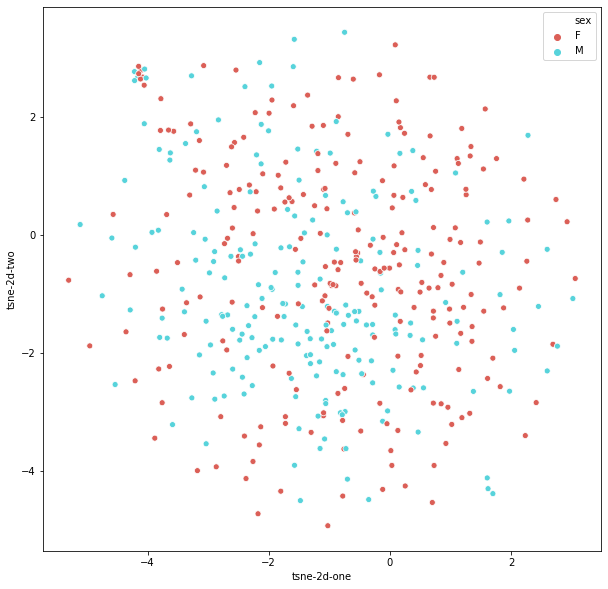

In [60]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "sex",
    palette = sns.color_palette("hls", 2),
    data = test
)
fig.figure.savefig("tsne-2d.png",dpi = 300)

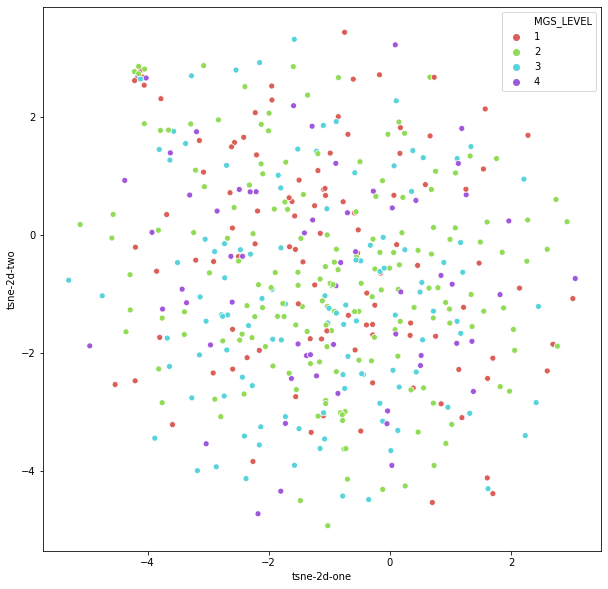

In [61]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "MGS_LEVEL",
    palette = sns.color_palette("hls", 4),
    data = test
)
fig.figure.savefig("tsne-2d.png",dpi = 300)